In [1]:
import torch
import torch.nn as nn

from lr_finder import LR_Finder

SEED = 42

torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [2]:
x = torch.randn(50_000, 20)
y = torch.randint(0, 1, (50_000, 1)).float()

LR=0.00313, loss=0.115291, best loss=0.000012 with best lr=0.05000


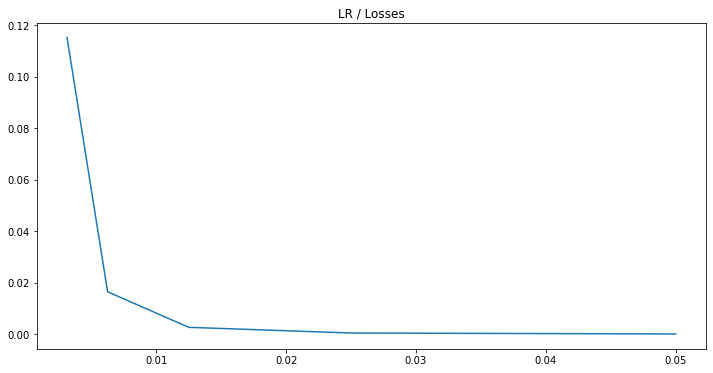

{'lr': [0.05, 0.025, 0.0125, 0.00625, 0.003125],
 'loss': [1.2282628631510306e-05,
  0.0003894783149007708,
  0.0025955450255423784,
  0.01642550528049469,
  0.11529145389795303]}

In [3]:
model = nn.Sequential(nn.Linear(20, 10), nn.ReLU(inplace=True), nn.Linear(10, 1))
criterion = nn.BCEWithLogitsLoss()

lr_finder = LR_Finder(model, criterion, torch.optim.Adam, dict(weight_decay=1e-8))

lr_finder.find(x, y, epochs=100, start_lr=0.05, eps_lr=0.5, steps=5)